In [1]:
import numpy as np

In [2]:
import numpy as np
import math as mt
from PIL import Image as im
from matplotlib import pyplot as plt
%matplotlib notebook
from __future__ import division

In [3]:
from scipy.ndimage.interpolation import map_coordinates

In [4]:
image_name = 'bauckhage.jpg'
raw_image = im.open(""+ image_name)
image = np.array(raw_image, dtype=np.float32)

In [5]:
def cilindrify(image, r0):
    size_prime = r0 + image.shape[0]
    coords = create_coords(size_prime*2)
    Rs= np.sqrt((coords[0] - size_prime)**2 + (coords[1]-size_prime) **2)
    sins = (size_prime - coords[1])/Rs
    coss = (coords[0] -size_prime)/Rs
    Xs = image.shape[0] - (Rs-r0)
    #Ys =   image.shape[1]/2 - (Rs-r0) * sins
    phis = ( (coss>=0) * np.arcsin(sins) + (coss<0)* (( sins>=0) * (np.pi - np.arcsin(sins)) + ( sins<0) * (-np.pi - np.arcsin(sins))))
    Ys =   np.floor(image.shape[1]//2  -  (image.shape[1]//2 / np.pi * phis ))
    output = map_coordinates(image, np.array([Xs, Ys]))
    
    return output[:, np.newaxis].reshape(size_prime*2, size_prime*2)

In [6]:
def create_coords(size):
    x=y =np.arange(0, size)
    out = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
    return out.transpose()

In [9]:
cil = cilindrify(image, 50)

/home/azhukov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/home/azhukov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide
/home/azhukov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater_equal
/home/azhukov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


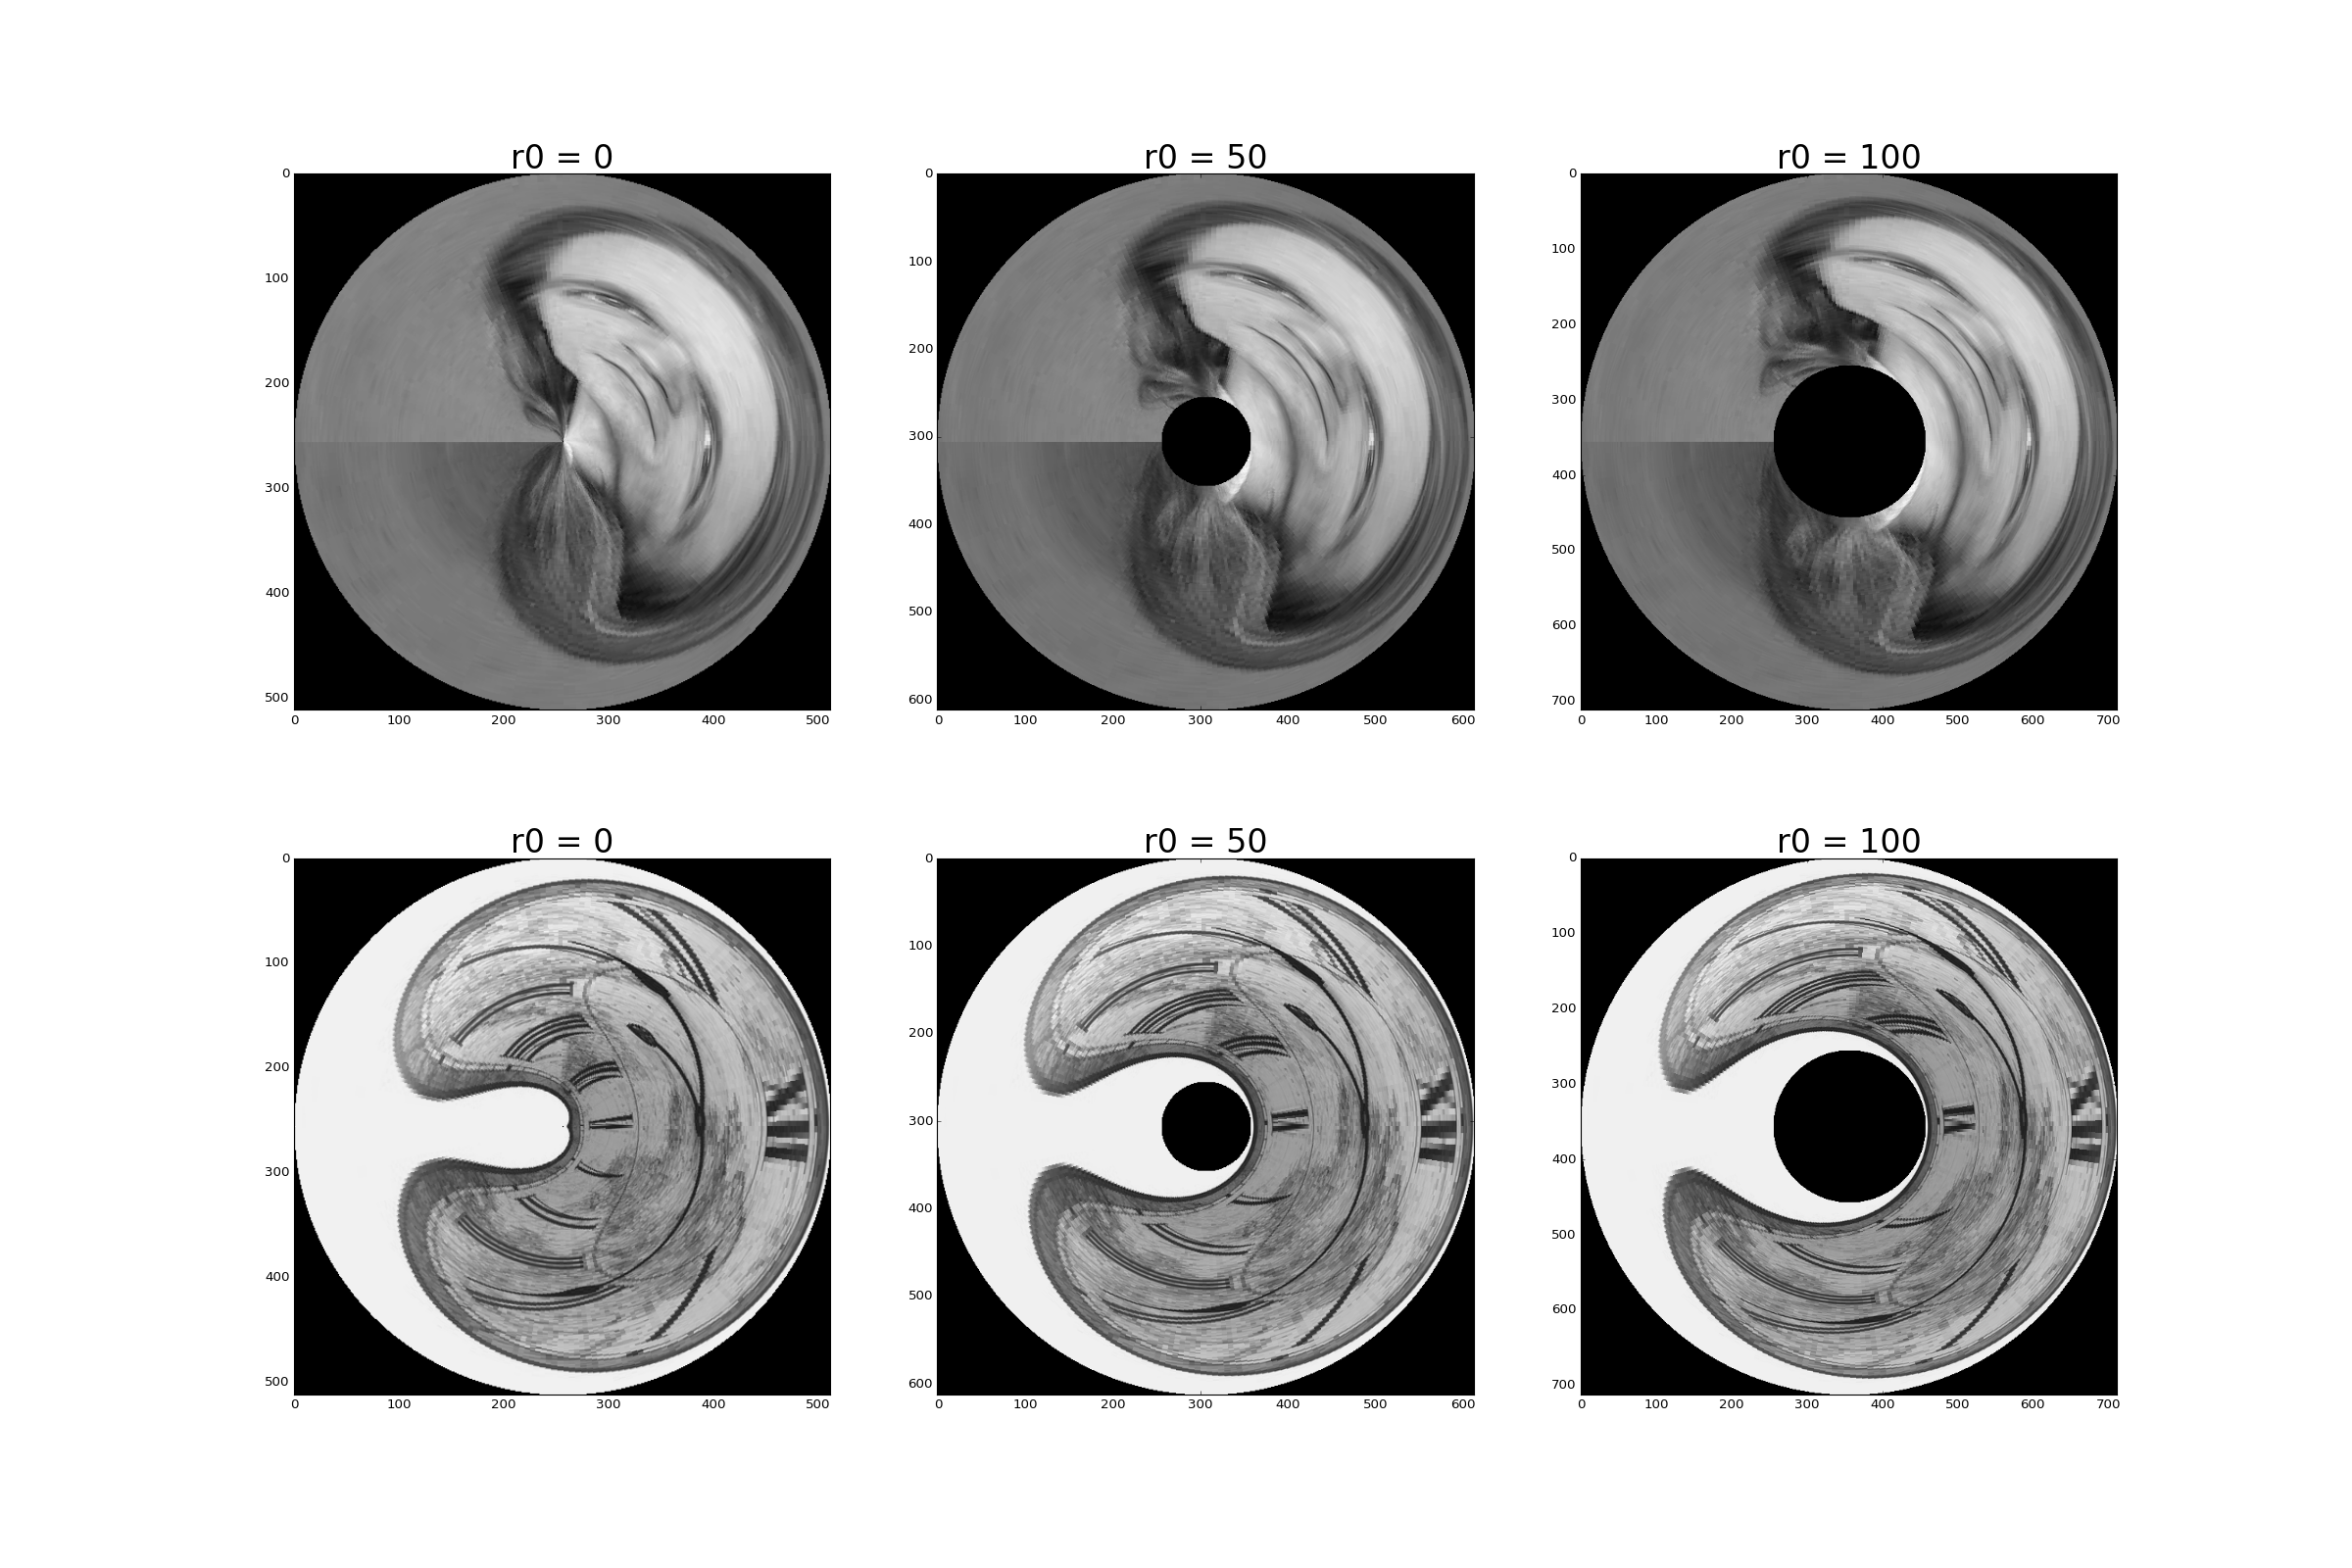

/home/azhukov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/home/azhukov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide
/home/azhukov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater_equal
/home/azhukov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less


In [21]:
fig, subplots = plt.subplots(2, 3, figsize=(30, 20))

image_name = 'bauckhage.jpg'
raw_image = im.open(""+ image_name)
image = np.array(raw_image, dtype=np.float32)

for i, r in enumerate([0, 50, 100]):
    subplots[0, i].set_title('r0 = {}'.format(r), fontsize = 30)
    subplots[0, i].imshow(cilindrify(image, r),'gray')

image_name = 'clock.jpg'
raw_image = im.open(""+ image_name)
image = np.array(raw_image, dtype=np.float32)

for i, r in enumerate([0, 50, 100]):
    subplots[1, i].set_title('r0 = {}'.format(r), fontsize = 30)
    subplots[1, i].imshow(cilindrify(image, r),'gray')


In [387]:
"""
plt.figure()
plt.imshow(Ys[np.newaxis, :].reshape([size_prime*2, size_prime*2]), 'gray')
"""


"\nplt.figure()\nplt.imshow(Ys[np.newaxis, :].reshape([size_prime*2, size_prime*2]), 'gray')\n"